In [12]:
import time 
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import linregress

In [13]:
# Initialize a list of tickers for the stock
tickers = ["LYV", "AMC", "AMZN", "NFLX", "DRI", "RUTH", "DAL", "AAL"]

#Define the variables
precovid_date = int(time.mktime(datetime.datetime(2015, 1, 1, 23, 59).timetuple()))
postcovid_date = int(time.mktime(datetime.datetime(2023, 1, 1, 23, 59).timetuple()))
interval = "1wk"

# Initialize an empty list to store the dataframes for each stock
dfs = []

# Fetch the data for each stock and store it in the dfs list
for ticker in tickers:
    query_string = f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={precovid_date}&period2={postcovid_date}&interval={interval}&events=history&includeAdjustedClose=true"
    df = pd.read_csv(query_string)
    df['Ticker'] = ticker
    df['Date'] = pd.to_datetime(df['Date'])  # Convert Date to datetime format
    dfs.append(df)

# Concatenate all the dataframes in the dfs list based on the common "Date" column
combined_df = pd.concat(dfs)

# Calculate Daily Trade Value for each stock
combined_df['Daily Trade Value'] = combined_df['Close'].astype(float) * combined_df['Volume'].astype(float)

# Rearrange columns with "Ticker" as the first column
combined_df = combined_df[['Ticker'] + [col for col in combined_df.columns if col != 'Ticker']]

#Saving date time formated df
datetime_combined_df = combined_df
datetime_combined_df['Year'] = datetime_combined_df['Date'].dt.year.astype(int)

#Change Datetime to Type Integer
combined_df['Date'] = pd.to_datetime(combined_df['Date']).astype(np.int64)

display(datetime_combined_df)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Trade Value,Year
0,LYV,1420070400000000000,26.219999,26.379999,24.709999,25.110001,25.110001,2973500,7.466459e+07,2015
1,LYV,1420675200000000000,25.389999,25.940001,24.440001,24.680000,24.680000,3113900,7.685105e+07,2015
2,LYV,1421280000000000000,24.750000,25.120001,24.330000,24.780001,24.780001,2537000,6.286686e+07,2015
3,LYV,1421884800000000000,24.950001,25.709999,24.500000,24.549999,24.549999,4677400,1.148302e+08,2015
4,LYV,1422489600000000000,24.559999,24.770000,23.530001,24.389999,24.389999,6481700,1.580887e+08,2015
...,...,...,...,...,...,...,...,...,...,...
413,AAL,1669852800000000000,14.460000,14.570000,13.530000,13.550000,13.550000,126615800,1.715644e+09,2022
414,AAL,1670457600000000000,13.650000,14.740000,13.240000,13.350000,13.350000,152529900,2.036274e+09,2022
415,AAL,1671062400000000000,13.160000,13.310000,12.380000,13.030000,13.030000,124570400,1.623152e+09,2022
416,AAL,1671667200000000000,12.980000,13.000000,12.230000,12.320000,12.320000,81902700,1.009041e+09,2022


In [14]:
df = datetime_combined_df.groupby(['Year'])['Daily Trade Value'].sum()
yearly_trade_df = pd.DataFrame(df)
yearly_trade_df

,Daily Trade Value
Year,
2015,1.220796e+12
2016,1.254100e+12
2017,1.365916e+12
2018,3.470459e+12
2019,2.574948e+12
2020,4.718716e+12
2021,4.698669e+12
2022,3.542618e+12


In [15]:
precovid_df = combined_df.loc[combined_df['Date'].values <= 1577750400000000000]
#display(precovid_df)   
    

In [18]:
#new_list = precovid_df.groupby(['Ticker']).sum()
#for tick in tickers:
    #loop_df=precovid_df.groupby(['Ticker'])
    #percent=(loop_df['Volume'].sum())/(precovid_df["Volume"].sum())
#print(percent)
#pie = plt.pie(new_list['Daily Trade Value'], labels = new_list['Ticker'], autopct = '%1.1f%%',
        #shadow=True, startangle=90)
#plt.show()

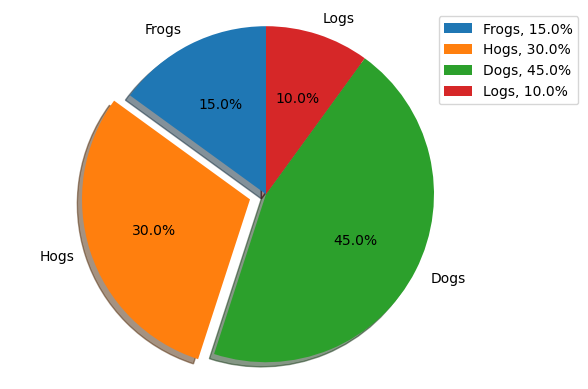

['Frogs, 15.0%', 'Hogs, 30.0%', 'Dogs, 45.0%', 'Logs, 10.0%']
Frogs, 15.0%


In [23]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
labels = [f'{l}, {s:0.1f}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

plt.show()

print(labels)
print(labels[0])

In [24]:
percent = []
for tick in tickers:
    loop_df=precovid_df.groupby(['Ticker'])
    percent=(loop_df['Daily Trade Value'].sum())/(precovid_df["Daily Trade Value"].sum())
print(percent)

Ticker
AAL     0.041709
AMC     0.002933
AMZN    0.615413
DAL     0.052028
DRI     0.016982
LYV     0.006708
NFLX    0.263628
RUTH    0.000598
Name: Daily Trade Value, dtype: float64


<Axes: ylabel='Daily Trade Value'>

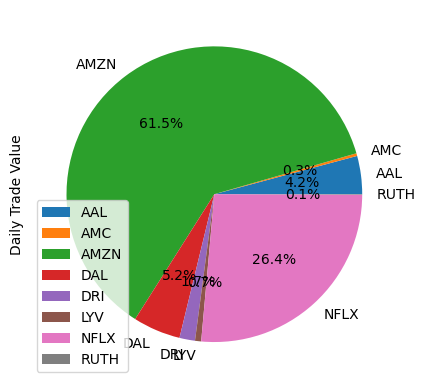

In [21]:
precovid_df.groupby(['Ticker']).sum().plot(kind='pie', autopct='%.1f%%',
                                            y='Daily Trade Value')

In [6]:
postcovid_df = combined_df.loc[combined_df['Date'].values >= 1577750400000000000]

<Axes: ylabel='Daily Trade Value'>

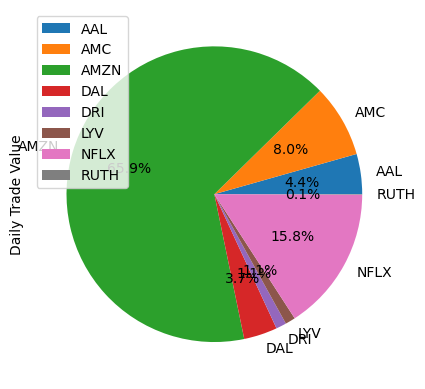

In [7]:
postcovid_df.groupby(['Ticker']).sum().plot(kind='pie', autopct='%.1f%%',
                                            y='Daily Trade Value')
    

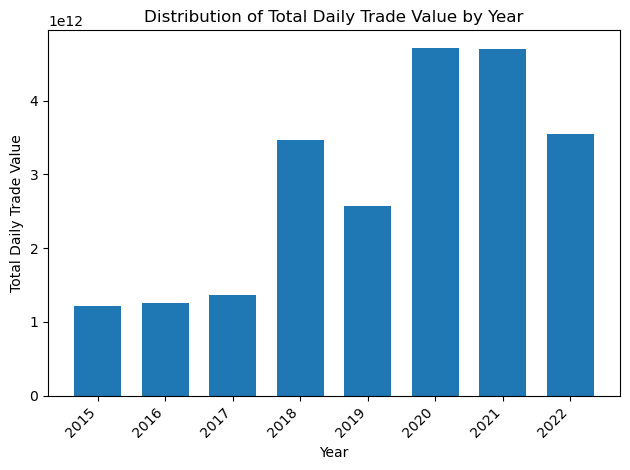

In [49]:
# Plot the histogram for the "Daily Trade Value" column from the yearly_trade_df
plt.bar(yearly_trade_df.index, yearly_trade_df['Daily Trade Value'], align='center', width=0.7)

# Add labels and title to the histogram
plt.xlabel("Year")
plt.ylabel("Total Daily Trade Value")
plt.title("Distribution of Total Daily Trade Value by Year")

# Set the ticks and labels for the X-axis with rotation
plt.xticks(yearly_trade_df.index, rotation=45, ha='right')

# Display the histogram
plt.tight_layout()
plt.show()